In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
FILE_NAME = 'analog_pwm_data.txt'

In [3]:
analog_data = pd.read_csv(FILE_NAME)

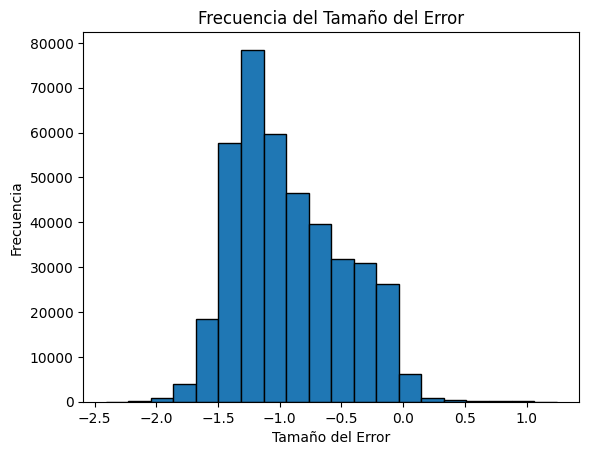

In [4]:
analog_data['error'] = analog_data['read_val'] - analog_data['ratio']

# This relative error has the problem that the ratio can be 0.0 and creates an relative_error = inf
analog_data['relative_error'] = (analog_data['error'] / analog_data['ratio']) * 100
finite_vals = analog_data[np.isfinite(analog_data['relative_error'])]

analog_data['arctang_error'] = np.arctan(analog_data['error'] / 1) * 100


analog_data['percentual_error'] = analog_data['error'] * 100 # Maybe 'percentual_error' is not the correct name


# Crear un histograma del tamaño del error
plt.hist(analog_data['percentual_error'], bins=20, edgecolor='black')
plt.title('Frecuencia del Tamaño del Error')
plt.xlabel('Tamaño del Error')
plt.ylabel('Frecuencia')
plt.show()


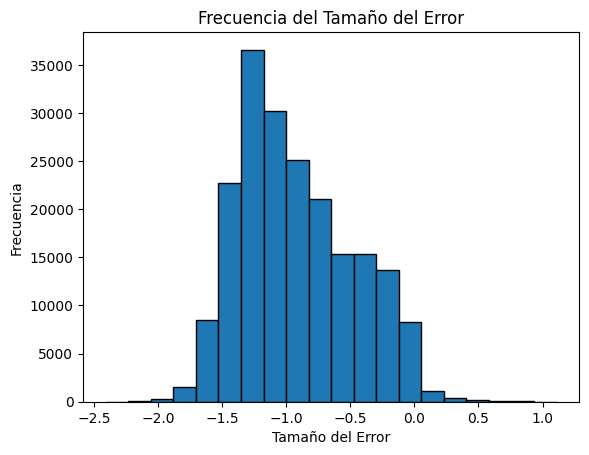

In [54]:
plt.hist(analog_data['arctang_error'], bins=20, edgecolor='black')
plt.title('Frecuencia del Tamaño del Error')
plt.xlabel('Tamaño del Error')
plt.ylabel('Frecuencia')
plt.show()

In [58]:
analog_data[analog_data['ratio'] == 0.0]

,iteration,frequency_in,frequency_out,resolution_out,ratio,read_val,error,relative_error,percentual_error,arctang_error
3030,0,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3031,1,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3032,2,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3033,3,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3034,4,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
174585,0,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174586,1,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174587,2,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174588,3,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0


# Percentual error analysis by ratio
We will group every ratio and make a mean for the percentual error.

In [5]:
def percentual_error_by_ratio_plotter(df, title):
    plt.plot(df['ratio'], df['percentual_error'])
    plt.ylabel('Percentual Error (%)')
    plt.xlabel('Ratio')
    plt.title(title)

def error_by_ratio(df, title):
    plt.plot(df['ratio'], df['error'])
    plt.ylabel('Error')
    plt.xlabel('Ratio')
    plt.title(title)

### Percentual error by ratio for all the different configs together

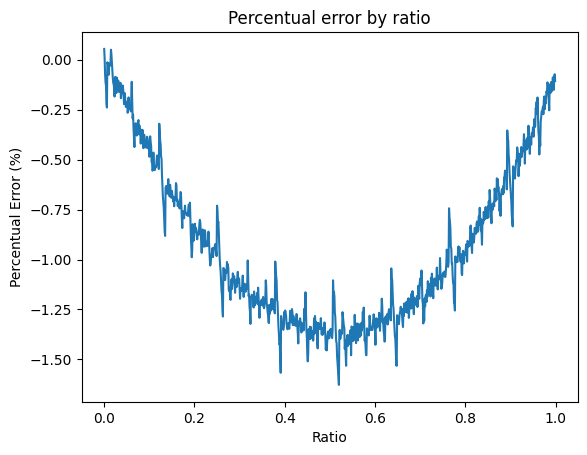

In [6]:
new_data = analog_data.groupby('ratio')['percentual_error'].mean().reset_index()
percentual_error_by_ratio_plotter(new_data, 'Percentual error by ratio')

### Comparison between percentual error by ratio for configs A and B

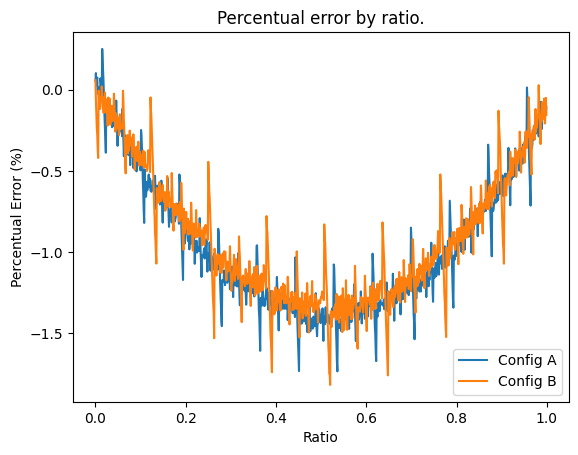

In [7]:
# Comparison between errors in config A and B
# Config A: Frequency IN = 10 kHz | Frequency OUT = 10 kHz
# Config B: Frequency IN = 5 kHz  | Frequency OUT = 15 kHz
analog_data_a = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 10000)]
percentual_error_by_ratio_a = analog_data_a.groupby('ratio')['percentual_error'].mean().reset_index()
analog_data_b = analog_data[(analog_data['frequency_out'] == 15000) & (analog_data['frequency_in'] == 5000)]
percentual_error_by_ratio_b = analog_data_b.groupby('ratio')['percentual_error'].mean().reset_index()

# One is for config A and the other is for config B.
percentual_error_by_ratio_plotter(percentual_error_by_ratio_a, 'Percentual error by ratio.')
percentual_error_by_ratio_plotter(percentual_error_by_ratio_b, 'Percentual error by ratio.')
plt.legend(['Config A', 'Config B'], loc='lower right')


### Comparison between percentual error by ratio for configs C and D

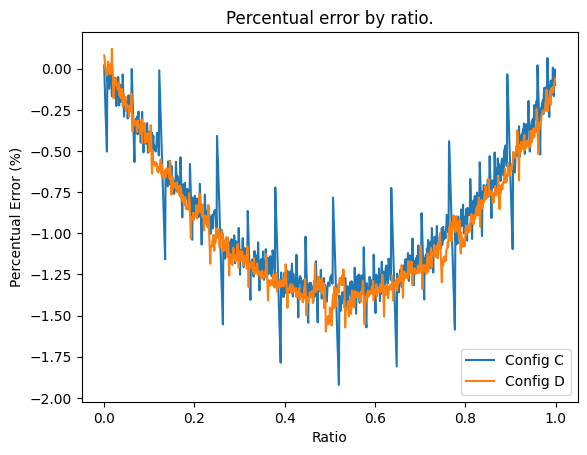

In [8]:
# Comparison between errors in config C and D
# Config C: Frequency IN = 10 kHz | Frequency OUT = 15 kHz
# Config D: Frequency IN = 15 kHz | Frequency OUT = 5 kHz
analog_data_c = analog_data[(analog_data['frequency_out'] == 15000) & (analog_data['frequency_in'] == 10000)]
percentual_error_by_ratio_c = analog_data_c.groupby('ratio')['percentual_error'].mean().reset_index()
analog_data_d = analog_data[(analog_data['frequency_out'] == 5000) & (analog_data['frequency_in'] == 15000)]
percentual_error_by_ratio_d = analog_data_d.groupby('ratio')['percentual_error'].mean().reset_index()

# One is for config C and the other is for config D.
percentual_error_by_ratio_plotter(percentual_error_by_ratio_c, 'Percentual error by ratio.')
percentual_error_by_ratio_plotter(percentual_error_by_ratio_d, 'Percentual error by ratio.')
plt.legend(['Config C', 'Config D'], loc='lower right')

### Comparison between percentual error by ratio for configs B and C

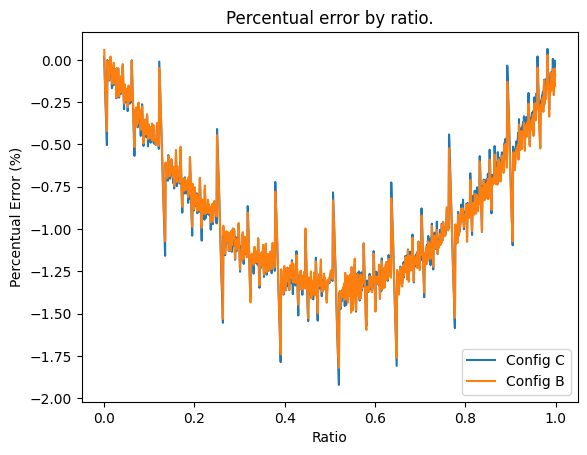

In [13]:
# Comparison between errors in config B and C
# Config B: Frequency IN = 5 kHz  | Frequency OUT = 15 kHz
# Config C: Frequency IN = 10 kHz | Frequency OUT = 15 kHz

# One is for config B and the other is for config C.
percentual_error_by_ratio_plotter(percentual_error_by_ratio_c, 'Percentual error by ratio.')
percentual_error_by_ratio_plotter(percentual_error_by_ratio_b, 'Percentual error by ratio.')
plt.legend(['Config C', 'Config B'], loc='lower right')

When frequency_IN > frequency_OUT, errors have less 'variation' but they do not necessarily become more accurate.

## Analisis de error porcentual por iteracion de lectura
Por cada vez que habia que leer un nuevo ratio, se hacian 5 lecturas continuas para ver si alguna de ellas mejoraba en cuanto a su aproximacion. Se juntaron los errores porcentuales por cada iteracion y se hizo un promedio para ver si en alguna de las iteraciones se conseguia alguna lectura mas acertada. Pero esto no sucedio ya que podemos ver por los graficos de barras que todos andan alrededor de un error porcentual del 0,95.  

In [33]:
iterations_a = analog_data_a.groupby(['iteration'])['percentual_error'].mean().reset_index()
iterations_b = analog_data_b.groupby(['iteration'])['percentual_error'].mean().reset_index()
iterations_a

,iteration,percentual_error
0,0,-0.955779
1,1,-0.943151
2,2,-0.941465
3,3,-0.944781
4,4,-0.942957


<BarContainer object of 5 artists>

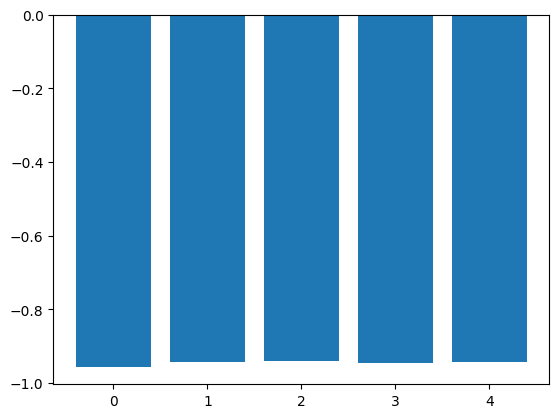

In [34]:
plt.bar(iterations_a['iteration'], iterations_a['percentual_error'])

<BarContainer object of 5 artists>

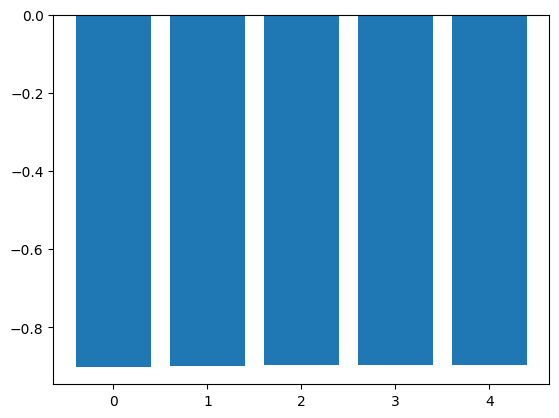

In [35]:
plt.bar(iterations_b['iteration'], iterations_b['percentual_error'])

## Error by difference of frequencies (Frequency_OUT - Frequency_IN)

In [14]:
freq_dif = analog_data
freq_dif['frequencies_dif'] = freq_dif['frequency_out'] - freq_dif['frequency_in'] # Frequency_OUT - Frequency_IN
freq_dif = freq_dif.groupby('frequencies_dif')['percentual_error'].mean().reset_index()
freq_dif

,frequencies_dif,percentual_error
0,-10000,-0.947196
1,0,-0.945627
2,5000,-0.903929
3,10000,-0.897733


<BarContainer object of 4 artists>

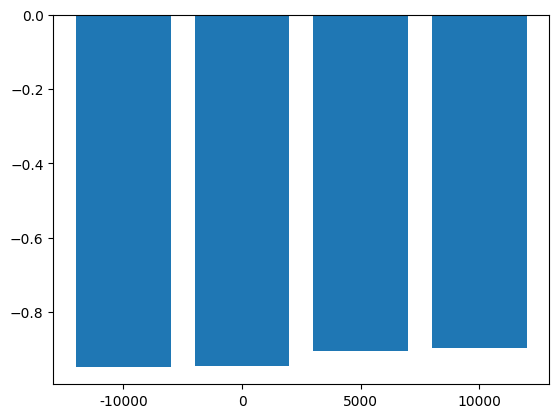

In [21]:
plt.bar(freq_dif['frequencies_dif'].astype(str), freq_dif['percentual_error'])